### Create Libraries

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report, r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

# Display data
import matplotlib.pyplot as plt
import numpy as np
import math



### Load Data

In [2]:
training = 'Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv'
test = 'Uniqlo(FastRetailing) 2017 Test - stocks2017.csv'

df_train = pd.read_csv(training)
df_test = pd.read_csv(test)

df_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


### Process Data
- Reformat date (year-month-day) to separate Year Month Date columns

In [12]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
#df_train = df_train.sort_values(by='Date')

df_train.insert(0, 'day', df_train['Date'].dt.day)
df_train.insert(0, 'month', df_train['Date'].dt.month)
df_train.insert(0, 'year', df_train['Date'].dt.year)

df_train = df_train.drop('Date', axis = 1)

df_test['Date'] = pd.to_datetime(df_test['Date'])
#df_test = df_test.sort_values(by='Date')

df_test.insert(0, 'day', df_test['Date'].dt.day)
df_test.insert(0, 'month', df_test['Date'].dt.month)
df_test.insert(0, 'year', df_test['Date'].dt.year)

df_test = df_test.drop('Date', axis = 1)


In [13]:
df_train.head()

,year,month,day,Open,High,Low,Close,Volume,Stock Trading
0,2016,12,30,42120,42330,41700,41830,610000,25628028000
1,2016,12,29,43000,43220,42540,42660,448400,19188227000
2,2016,12,28,43940,43970,43270,43270,339900,14780670000
3,2016,12,27,43140,43700,43140,43620,400100,17427993000
4,2016,12,26,43310,43660,43090,43340,358200,15547803000


In [14]:
df_test.head()

,year,month,day,Open,High,Low,Close,Volume,Stock Trading
0,2017,1,13,38900,39380,38240,38430,1321200,51197289000
1,2017,1,12,38300,38450,37930,38010,800900,30540359000
2,2017,1,11,38710,38880,38480,38560,545900,21089798000
3,2017,1,10,38620,38850,38150,38690,1196900,46107703000
4,2017,1,6,40500,41030,39720,39720,1435500,57708934000


### Splitting Data

In [15]:
X_train = df_train.drop(columns=["Close"])
y_train = df_train["Close"]
X_test = df_test.drop(columns=["Close"])
y_test = df_test["Close"]

In [16]:
print(X_train.shape)
X_train.head()

(1226, 8)


,year,month,day,Open,High,Low,Volume,Stock Trading
0,2016,12,30,42120,42330,41700,610000,25628028000
1,2016,12,29,43000,43220,42540,448400,19188227000
2,2016,12,28,43940,43970,43270,339900,14780670000
3,2016,12,27,43140,43700,43140,400100,17427993000
4,2016,12,26,43310,43660,43090,358200,15547803000


In [17]:
print(y_train.shape)
y_train.head()

(1226,)


0    41830
1    42660
2    43270
3    43620
4    43340
Name: Close, dtype: int64

In [18]:
print(X_test.shape)
X_test.head()

(7, 8)


,year,month,day,Open,High,Low,Volume,Stock Trading
0,2017,1,13,38900,39380,38240,1321200,51197289000
1,2017,1,12,38300,38450,37930,800900,30540359000
2,2017,1,11,38710,38880,38480,545900,21089798000
3,2017,1,10,38620,38850,38150,1196900,46107703000
4,2017,1,6,40500,41030,39720,1435500,57708934000


In [19]:
print(y_test.shape)
y_test.head()

(7,)


0    38430
1    38010
2    38560
3    38690
4    39720
Name: Close, dtype: int64

### Random Forest Regression

In [20]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

#### Test Predictions

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
print(y_pred)

[38825.35 38026.   38724.2  38615.1  40350.65 42516.   42750.55]


In [23]:
print(y_test)

0    38430
1    38010
2    38560
3    38690
4    39720
5    42590
6    43290
Name: Close, dtype: int64


### Metrics

In [24]:
print("MSE : ", mean_squared_error(y_test, y_pred))

MSE :  126190.14249999954


In [25]:
# Calculate regression metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print metrics
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape, "%")

R2 Score: 0.9681720209061476
Mean Squared Error: 126190.14249999954
Root Mean Squared Error: 355.2325189224651
Mean Absolute Error: 270.64999999999935
Mean Absolute Percentage Error: 0.6711267630002982 %


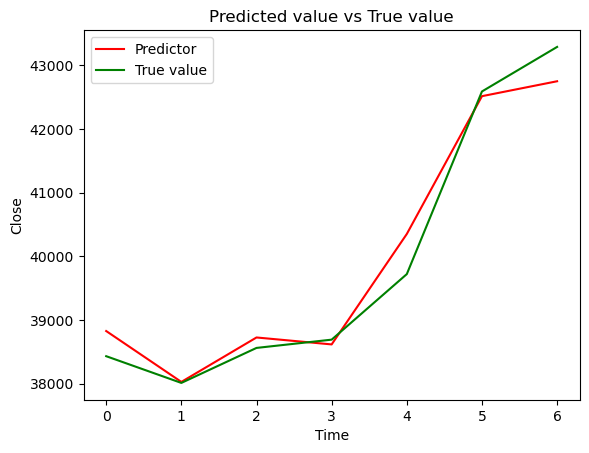

In [26]:
y = y_pred
z = y_test

plt.plot(y_pred, color='r', label='Predictor')
plt.plot(y_test, color='g', label='True value')

plt.xlabel("Time")
plt.ylabel("Close")
plt.title("Predicted value vs True value")

plt.legend()
plt.show()